<a href="https://colab.research.google.com/github/vinayak-pathak/pyprac_f/blob/master/Image_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install tensorflow_datasets
!pip3 install tensorflow-gpu==2.0.0-rc0
!nvidia-smi

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ds_corrupted = tfds.load('mnist_corrupted/shot_noise', shuffle_files=False, split=tfds.Split.TRAIN)
ds_identity = tfds.load('mnist_corrupted/identity', shuffle_files=False, split=tfds.Split.TRAIN)
ds_corrupted = ds_corrupted.map(lambda x: x['image'])
ds_identity = ds_identity.map(lambda x: x['image'])
ds = tf.data.Dataset.zip((ds_corrupted, ds_identity))

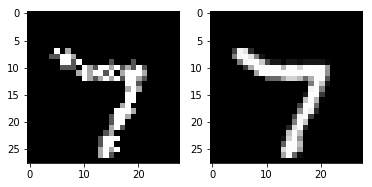

In [ ]:
BATCH_SIZE = 128

for x,y in ds: break
fig, axes = plt.subplots(1,2)
axes[0].imshow(np.squeeze(x.numpy()), cmap='gray')
axes[1].imshow(np.squeeze(y.numpy()), cmap='gray')
ds = ds.batch(BATCH_SIZE).repeat()

In [ ]:
# Fully Connected Model
inputs = tf.keras.layers.Input(shape=(28,28,1))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(784, activation='relu')(x)
x = tf.keras.layers.Dense(784, activation='relu')(x)
x = tf.keras.layers.Reshape((28, 28, 1))(x)
model = tf.keras.Model(inputs, x)
model.compile('adam', loss='mse')'
model.fit(ds, steps_per_epoch=50000//128, epochs=20)

In [ ]:
# Convolutional
inputs = tf.keras.layers.Input(shape=(28,28,1))
x = tf.keras.layers.Conv2D(4, (3,3), activation='relu', padding='same')(inputs)
x = tf.keras.layers.Conv2D(4, (3,3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(1, (3,3), activation='relu', padding='same')(x)
model = tf.keras.Model(inputs, x)
model.compile('adam', loss='mse')
model.fit(ds, steps_per_epoch=50000//128, epochs=20)

Train for 390 steps
Epoch 1/20
390/390 [==============================] - 53s 137ms/step - loss: 1380.4002
Epoch 2/20
390/390 [==============================] - 53s 135ms/step - loss: 462.2428
Epoch 3/20
390/390 [==============================] - 53s 135ms/step - loss: 424.8525
Epoch 4/20
390/390 [==============================] - 53s 135ms/step - loss: 414.5865
Epoch 5/20
390/390 [==============================] - 52s 134ms/step - loss: 410.0008
Epoch 6/20
390/390 [==============================] - 53s 136ms/step - loss: 406.0983
Epoch 7/20
390/390 [==============================] - 53s 135ms/step - loss: 404.4110
Epoch 8/20
390/390 [==============================] - 52s 134ms/step - loss: 401.9670
Epoch 9/20
390/390 [==============================] - 52s 134ms/step - loss: 400.6245
Epoch 10/20
390/390 [==============================] - 52s 134ms/step - loss: 399.1064
Epoch 11/20
390/390 [==============================] - 52s 134ms/step - loss: 397.9744
Epoch 12/20
390/390 [==========

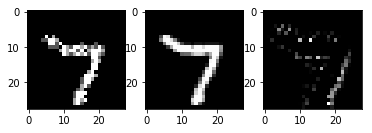

In [ ]:
for x,y in ds: break
fig, axes = plt.subplots(1,3)
axes[0].imshow(np.squeeze(x.numpy()[0]), cmap='gray')
axes[1].imshow(np.squeeze(y.numpy()[0]), cmap='gray')
axes[2].imshow(np.squeeze(model.predict(x.numpy().astype('float32'))[0]), cmap='gray')
